In [1]:
import pandas as pd

# 데이터 로드
data_path = r'C:\team_proj\dog_adoption\Mung_ai\dog_adopt_eda(3).csv'
df = pd.read_csv(data_path)

# 각 피처의 고유한 값들과 그 개수 확인
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    print(f"'{column}' 피처의 고유 값 개수: {unique_count}")
    print(f"'{column}' 피처의 고유 값들: {unique_values}\n")

'품종' 피처의 고유 값 개수: 51
'품종' 피처의 고유 값들: ['믹스견' '비숑 프리제' '푸들' '말티즈' '웰시 코기 카디건' '잉글리쉬 포인터' '포메라니안' '치와와'
 '이탈리안 그레이 하운드' '시츄' '요크셔 테리어' '셔틀랜드 쉽독' '토이 푸들' '시바' '시베리안 허스키' '스피츠'
 '라브라도 리트리버' '진도견' '보스턴 테리어' '미디엄 푸들' '보더 콜리' '사모예드' '잭 러셀 테리어'
 '그레이트 피레니즈' '그레이 하운드' '올드 잉글리쉬 불독' '골든 리트리버' '라이카' '슈나우져' '프렌치 불독'
 '마리노이즈' '페키니즈' '휘펫' '삽살개' '닥스훈트' '코카 스파니엘' '아키다' '도베르만' '차우차우' '화이트테리어'
 '퍼그' '화이트리트리버' '웰시 코기 펨브로크' '베들링턴 테리어' '포인터' '빠삐용' '불독' '말라뮤트'
 '올드 잉글리쉬 쉽독' '저먼 셰퍼드 독' '셰퍼드']

'성별' 피처의 고유 값 개수: 2
'성별' 피처의 고유 값들: ['수컷' '암컷']

'무게(Kg)' 피처의 고유 값 개수: 83
'무게(Kg)' 피처의 고유 값들: [ 9.3   4.3   6.    4.5   5.2   2.6  23.    0.1  11.3   2.5   4.4   1.3
  1.1   2.4   4.1   5.5   2.2   3.2   5.8   3.8   3.5   2.8   2.9   3.
  3.6   3.9   2.3   2.    0.9   1.    1.8   5.   10.   12.    7.    0.5
 20.   15.    4.    8.   25.   18.    5.7  22.5  30.   45.    0.2   9.
  0.25 17.   16.   40.   22.    0.8  13.   14.    0.3   8.5  11.   19.
  0.08 35.    6.5   7.5   1.5  28.    1.4   0.6   4.2   0.7  24.   21.
  1.

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import category_encoders as ce


# 1. 품종: Frequency Encoding (빈도수 인코딩)
df['품종_freq'] = df['품종'].map(df['품종'].value_counts())

# 2. 성별: Label Encoding
label_encoder = LabelEncoder()
df['성별'] = label_encoder.fit_transform(df['성별'])

# 3. 무게(Kg): Standard Scaling
scaler = StandardScaler()
df['무게(Kg)'] = scaler.fit_transform(df[['무게(Kg)']])

# 4. 상태: Label Encoding (입양 여부)
df['상태'] = label_encoder.fit_transform(df['상태'])

# 5. 나이: 그대로 사용 (숫자형 연속 데이터)
# 이미 숫자이므로 추가적인 인코딩 필요 없음

# 6. 성격: Label Encoding
df['성격'] = label_encoder.fit_transform(df['성격'])

# 7. 색: Label Encoding
df['색'] = label_encoder.fit_transform(df['색'])

# 8. 중성화유무: Label Encoding
df['중성화유무'] = label_encoder.fit_transform(df['중성화유무'])

# 9. 건강: Target Encoding
target_enc = ce.TargetEncoder(cols=['건강'])
df['건강'] = target_enc.fit_transform(df['건강'], df['상태'])


# 품종 원래 컬럼 제거 (원하는 경우)
df.drop(columns=['품종'], inplace=True)

# 인코딩된 데이터프레임 확인
print(df.head())


   성별    무게(Kg)  상태  나이  성격  색  중성화유무        건강  품종_freq
0   0  0.230195   0  44   1  1      1  0.337774     1410
1   0 -0.492241   1  68   1  5      2  0.427888       19
2   0 -0.246613   1  32   1  5      2  0.427888       19
3   0 -0.463343   1  44   1  0      2  0.337774       61
4   1 -0.362202   1  67   1  5      0  0.427888       19


In [4]:
# 상태 컬럼의 각 값의 개수 확인
status_counts = df['상태'].value_counts()
print(status_counts)


상태
0    1220
1     635
Name: count, dtype: int64


In [5]:
from imblearn.over_sampling import SMOTE

# 피처와 타겟 변수 정의
X = df.drop(columns=['상태'])  # 피처 데이터
y = df['상태']  # 타겟 변수

# SMOTE 오버샘플링 전에 피처 데이터가 수치형인지 확인
# 이미 인코딩한 데이터로 가정
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 결과 확인
print(f"Original dataset shape: {X.shape}, {y.shape}")
print(f"Resampled dataset shape: {X_resampled.shape}, {y_resampled.shape}")


Original dataset shape: (1855, 8), (1855,)
Resampled dataset shape: (2440, 8), (2440,)


In [6]:
# 오버샘플링된 상태 컬럼의 각 값의 개수 확인
status_counts_resampled = pd.Series(y_resampled).value_counts()
print(status_counts_resampled)


상태
0    1220
1    1220
Name: count, dtype: int64


In [7]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# LazyClassifier 실행
model = LazyClassifier(verbose=0, ignore_warnings=False, predictions=True)
models, predictions = model.fit(X_train, X_test, y_train, y_test)

# 결과 출력
print(models)


 29%|██▉       | 9/31 [00:00<00:00, 33.46it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
FixedThresholdClassifier model failed to execute
FixedThresholdClassifier.__init__() missing 1 required positional argument: 'estimator'


 84%|████████▍ | 26/31 [00:00<00:00, 29.78it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
TunedThresholdClassifierCV model failed to execute
TunedThresholdClassifierCV.__init__() missing 1 required positional argument: 'estimator'


100%|██████████| 31/31 [00:01<00:00, 23.31it/s]

[LightGBM] [Info] Number of positive: 862, number of negative: 846
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 1708, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504684 -> initscore=0.018736
[LightGBM] [Info] Start training from score 0.018736
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.85               0.85     0.85      0.85   
RandomForestClassifier             0.85               0.85     0.85      0.85   
LGBMClassifier                     0.84               0.84     0.84      0.84   
BaggingClassifier                  0.84       

In [8]:
# 각 피처의 이름과 상위 5개 데이터를 데이터프레임 형식으로 출력
summary_df = pd.DataFrame({column: df[column].head() for column in df.columns})
print(summary_df)


   성별  무게(Kg)  상태  나이  성격  색  중성화유무   건강  품종_freq
0   0    0.23   0  44   1  1      1 0.34     1410
1   0   -0.49   1  68   1  5      2 0.43       19
2   0   -0.25   1  32   1  5      2 0.43       19
3   0   -0.46   1  44   1  0      2 0.34       61
4   1   -0.36   1  67   1  5      0 0.43       19


In [9]:
# pandas 출력 옵션 설정
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력
pd.set_option('display.width', None)  # 넓이에 제한 없이 출력
pd.set_option('display.max_colwidth', None)  # 열의 최대 너비 제한 해제

# 각 레이블별 중복되지 않은 데이터값 확인
unique_values_per_label = df.groupby('상태').agg(lambda x: x.unique().tolist())

# 결과 출력
print("각 레이블별 중복되지 않은 데이터 값:")
print(unique_values_per_label)


각 레이블별 중복되지 않은 데이터 값:
        성별  \
상태           
0   [0, 1]   
1   [0, 1]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [10]:
print(set(y_train))
print(len(set(y_train)))  # 클래스의 개수를 출력

{0, 1}
2


[0]	validation_0-logloss:0.68823	validation_0-error:0.38056	validation_1-logloss:0.68893	validation_1-error:0.40847
[1]	validation_0-logloss:0.68345	validation_0-error:0.25995	validation_1-logloss:0.68456	validation_1-error:0.26366
[2]	validation_0-logloss:0.67876	validation_0-error:0.25703	validation_1-logloss:0.68028	validation_1-error:0.26503
[3]	validation_0-logloss:0.67415	validation_0-error:0.25703	validation_1-logloss:0.67607	validation_1-error:0.26503
[4]	validation_0-logloss:0.66962	validation_0-error:0.19555	validation_1-logloss:0.67195	validation_1-error:0.20492
[5]	validation_0-logloss:0.66519	validation_0-error:0.19555	validation_1-logloss:0.66791	validation_1-error:0.20492
[6]	validation_0-logloss:0.66083	validation_0-error:0.19555	validation_1-logloss:0.66395	validation_1-error:0.20492
[7]	validation_0-logloss:0.65656	validation_0-error:0.19496	validation_1-logloss:0.66006	validation_1-error:0.20492


[8]	validation_0-logloss:0.65237	validation_0-error:0.19438	validation_1-logloss:0.65631	validation_1-error:0.20492
[9]	validation_0-logloss:0.64825	validation_0-error:0.19204	validation_1-logloss:0.65256	validation_1-error:0.21038
[10]	validation_0-logloss:0.64420	validation_0-error:0.19204	validation_1-logloss:0.64895	validation_1-error:0.21038
[11]	validation_0-logloss:0.64023	validation_0-error:0.19204	validation_1-logloss:0.64540	validation_1-error:0.21038
[12]	validation_0-logloss:0.63632	validation_0-error:0.19204	validation_1-logloss:0.64187	validation_1-error:0.21038
[13]	validation_0-logloss:0.63248	validation_0-error:0.19204	validation_1-logloss:0.63840	validation_1-error:0.21038
[14]	validation_0-logloss:0.62871	validation_0-error:0.19204	validation_1-logloss:0.63504	validation_1-error:0.21038
[15]	validation_0-logloss:0.62501	validation_0-error:0.19204	validation_1-logloss:0.63171	validation_1-error:0.21038
[16]	validation_0-logloss:0.62137	validation_0-error:0.19087	valid

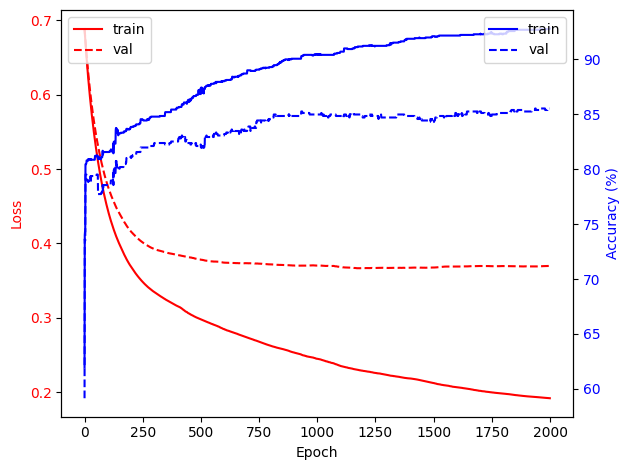

In [76]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# XGBoost 모델 초기화
model = XGBClassifier(
    n_estimators=2000,               # 트리 개수
    learning_rate=0.01,              # 학습률
    max_depth=5,                     # 최대 깊이
    reg_alpha=0.1,                   # L1 정규화
    reg_lambda=0.5,                    # L2 정규화
    objective='binary:logistic',     # 이진 분류
    eval_metric=['logloss', 'error'],  # 로지스틱 손실 + 에러율
    use_label_encoder=False          # 레이블 인코더 사용 안 함
)

# 모델 학습
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

# 예측
y_pred = model.predict(X_test)

# 정확도 확인 (퍼센트로 소수점 2번째 자리까지)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"정확도: {accuracy:.2f}%")

# 모델 평가 로그에서 loss와 error 값을 가져오기
results = model.evals_result()

# 에포크(epochs)
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# 그래프 그리기
fig, ax1 = plt.subplots()

# Loss (왼쪽 Y축)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='red')
ax1.plot(x_axis, results['validation_0']['logloss'], label='train', color='red', linestyle='-')

# 'validation_1' 키가 없을 경우 'validation_0' 키 사용
ax1.plot(x_axis, results.get('validation_1', results['validation_0'])['logloss'], label='val', color='red', linestyle='--')
ax1.tick_params(axis='y', labelcolor='red')

# 정확도 (오른쪽 Y축)
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy (%)', color='blue')

# 각 에포크마다 1 - error 적용하여 정확도 계산
train_accuracy = [100 * (1 - e) for e in results['validation_0']['error']]
val_accuracy = [100 * (1 - e) for e in results.get('validation_1', results['validation_0'])['error']]

ax2.plot(x_axis, train_accuracy, label='train', color='blue', linestyle='-')
ax2.plot(x_axis, val_accuracy, label='val', color='blue', linestyle='--')
ax2.tick_params(axis='y', labelcolor='blue')

# 범례
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 출력
plt.show()
